In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
import numpy as np
import seaborn as sns

In [2]:
preds = [6399038000, 8240000000,11310237000,12208281000,11361323000,10803387000,12348385000,13074100000, 12857667000,17743400000,21145200000]
true = [8613483384.46, 11334538970.16,10813732699.53, 8101885886.87,8916328469.16, 9962889434.44, 11518070774.48,11700807336.31,16900358608,17336881098.56,15165765187.88]
years = range(2010,2021)

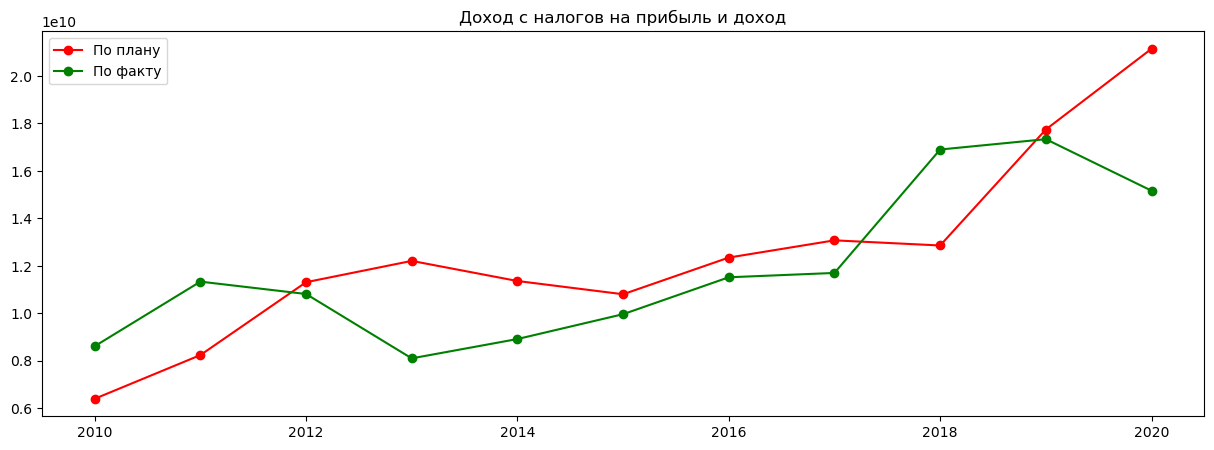

In [3]:
fig, axes = plt.subplots(figsize=(15,5))
axes.plot(years,preds,'r-o',label='По плану')
axes.plot(years,true,'g-o',label='По факту')
axes.legend()
axes.set_title('Доход с налогов на прибыль и доход')
plt.show()

In [4]:
abs(np.array(preds)-np.array(true)).mean()/10**10

0.23481480068536362

In [5]:
path = 'data/predictions_budget/'
file = '2010-2012.xls'
df = pd.read_excel(path+file, header=[2,3]).dropna(how='any')
df=df.drop(labels=[(            'Единицы',          'измерения'),('2010 год    прогноз',          'вариант 1'),( '2011 год   прогноз',          'вариант 1'),('2012 год   прогноз',          'вариант 1')],axis='columns')

In [6]:
df=df.T
df = df.rename(columns=df.iloc[0])
df

,,Численность постоянного населения (среднегодовая) - всего,декабрь к декабрю,в среднем за год,в основных ценах соответствующих лет,в сопоставимых ценах,Индекс промышленного производства (С+D+E),индекс производства,индекс производства,"производство пищевых продуктов, включая напитки, и табака",обработка древесины и производство изделий из дерева,...,"Налогооблагаемая прибыль\n(база для исчисления налога на прибыль, поступающего в бюджет РК)","Среднегодовая остаточная стоимость облагаемого имущества - всего\n(база для исчисления налога на имущество организаций, поступающего в бюджет РК)",Внешнеторговый оборот,Темпы роста,Экспорт – всего,Темпы роста,Импорт – всего,Темпы роста,"Численность безработных, зарегистрированных в службах занятости(среднегодовая)",Уровень зарегистрированной безработицы (к численности экономически активного населения)
Показатели,Unnamed: 0_level_1,Численность постоянного населения (среднегодов...,декабрь к декабрю,в среднем за год,в основных ценах соответствующих лет,в сопоставимых ценах,Индекс промышленного производства (С+D+E),индекс производства,индекс производства,"производство пищевых продуктов, включая напи...",обработка древесины и производство изделий и...,...,Налогооблагаемая прибыль\n(база для исчисления...,Среднегодовая остаточная стоимость облагаемого...,Внешнеторговый оборот,Темпы роста,Экспорт – всего,Темпы роста,Импорт – всего,Темпы роста,"Численность безработных, зарегистрированных в ...",Уровень зарегистрированной безработицы (к чи...
2007 год,факт,691.9,113.1,110.4,104622.9,108.5,116.8,109.6,119.3,137.7,104.0,...,17066.0,74460.0,1758.3,114.6,1344.5,106.4,413.8,152.6,10.4,2.7
2008 год,факт,689.1,112.7,113.8,118500 *,101,100,97.3,99.2,113,84.8,...,24807,83732.8,1951.5,111,1483.8,110.4,467.7,113,8,2.1
2009 год,оценка,686.5,"113-113,5",115,117750,92,89,79,88,98,72,...,5200,95500,1272,65.2,1052,70.9,220,47,12.7,3.3
2010 год прогноз,вариант 2,684.6,110.0,112.0,130820.0,100.0,101.0,104.0,101.0,103.0,105.0,...,6000.0,97900.0,1280.0,100.628931,1050.0,99.809886,230.0,104.545455,12.3,3.2
2011 год прогноз,вариант 2,683.1,108.0,110.0,148220.0,102.5,102.5,106.0,102.0,102.5,108.0,...,6400.0,102000.0,1350.0,105.46875,1100.0,104.761905,250.0,108.695652,12.0,3.1
2012 год прогноз,вариант 2,682.0,107.0,107.5,168000.0,103.0,104.5,107.0,105.0,103.0,115.0,...,7100.0,107100.0,1430.0,104.1,1150.0,104.545455,280.0,112.0,11.5,3.0


In [7]:
df=df.drop((         'Показатели', 'Unnamed: 0_level_1'),axis='index')

In [8]:
df =df.reset_index().drop(['level_0','level_1'],axis='columns')

In [18]:
def remove_star(x):
    try:
        return x.replace('*','')
    except:
        return x

In [22]:
df.loc[2,'    декабрь к декабрю ']=113.25
corr = df.applymap(remove_star).corr()

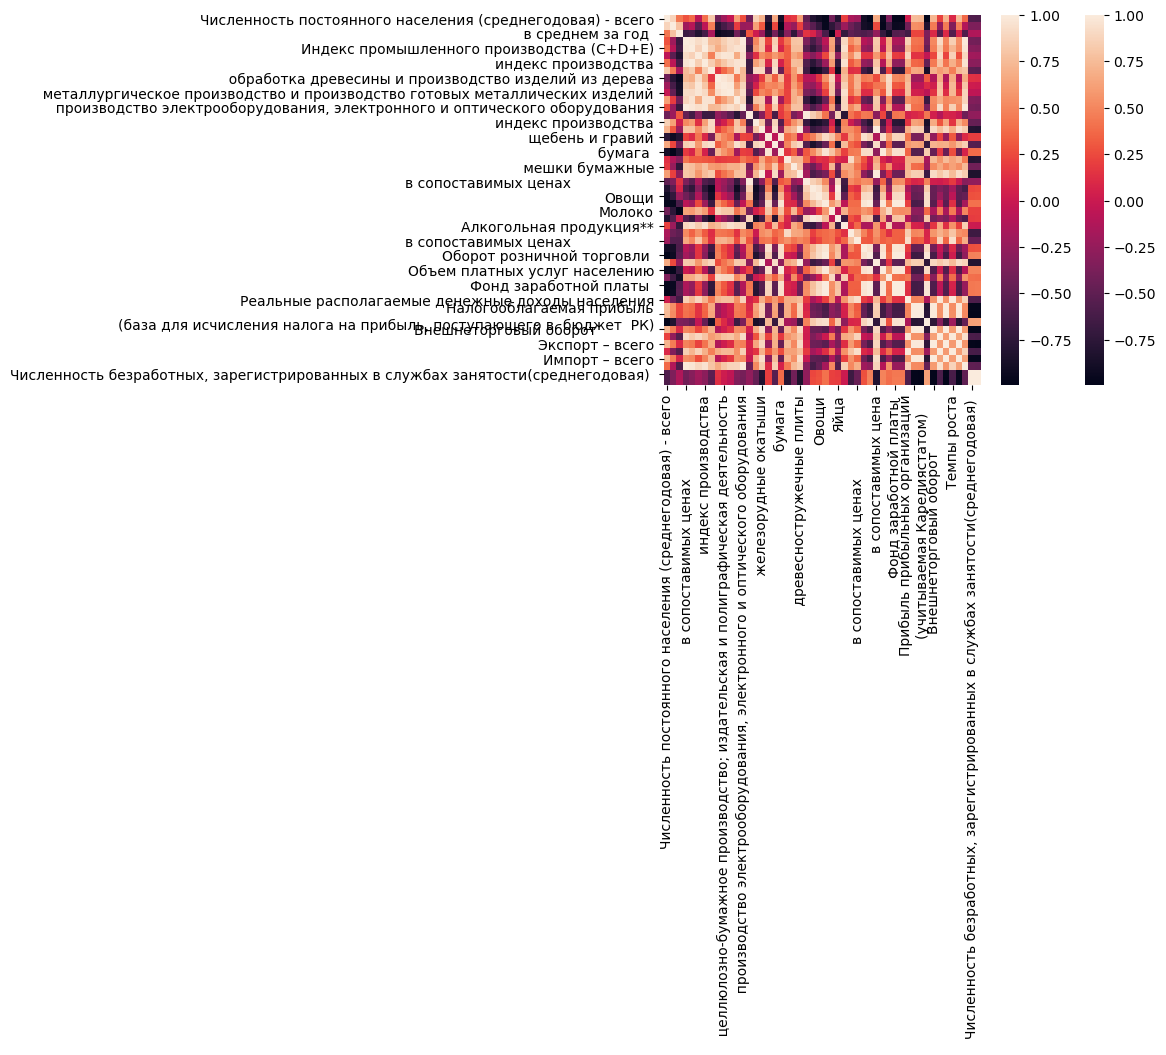

In [26]:
sns.heatmap(corr)
plt.show()